## Importing Data

In [233]:
import pandas as pd
import numpy as np

In [234]:
df = pd.read_csv('Automobile price data _Raw_.csv')

In [235]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [236]:
df.shape

(205, 26)

In [237]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [238]:
#So there are no 'np.nan' values in the data, but still some columns are object type when they should be integer or float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [239]:
#Checking to see what value is making this column a data type 'object'
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [240]:
#Checking to see if there is '?' value in these columns or not
cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'num-of-cylinders', 'fuel-system']
for i in cols:
    print(i ,df[i].unique())

make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four' '?']
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
engine-type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num-of-cylinders ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel-system ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [241]:
#only column 'num-of-doors' has value '?' in it
#Columns 'fuel-type', 'aspiration', 'num-of-doors', 'engine-location' will need label encoding
#Column 'num-of-cylinders' can be replaced with its respective values
#Every other column needs OneHotEncoding

In [242]:
#Replacing '?' values with mode as this is a categorical column
mode_nod = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace('?', mode_nod, inplace = True)


In [243]:
print(df)

     symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

In [244]:
df = df.replace('?', np.nan)


In [245]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [246]:
cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for i in cols:
    df[i] = pd.to_numeric(df[i])

In [247]:
df.fillna(df.mean(), inplace= True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [248]:
df['price'].max()

45400.0

## EDA

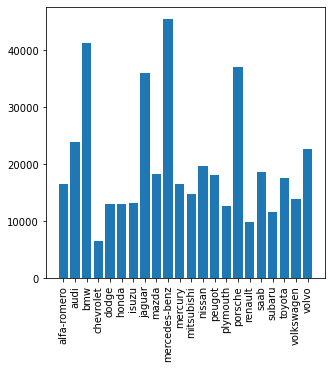

In [249]:
#Lets see which automobile maker has the highest price
#Mercedes Benz has the highest price
import seaborn as sns
import matplotlib.pyplot as plt
plt.bar(x = 'make', height = 'price', data = df )
plt.xticks(rotation = 90)
plt.show()

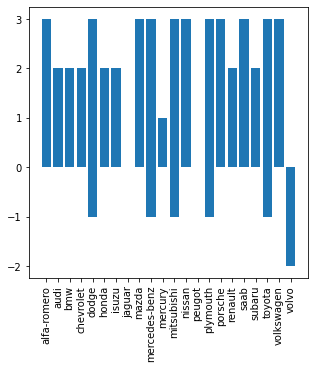

In [250]:
#lets see which car has more least risk 
#Volvo has this
plt.bar(x = 'make', height = 'symboling', data = df )
plt.xticks(rotation = 90)
plt.show()

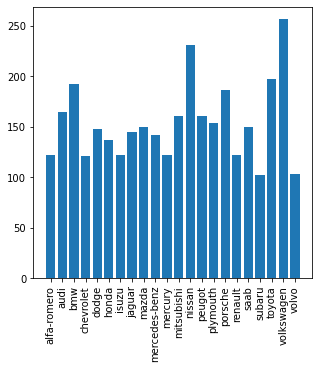

In [251]:
#which car has the highest normalized losses
#Volkswagen
plt.bar(x = 'make', height = 'normalized-losses', data = df )
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

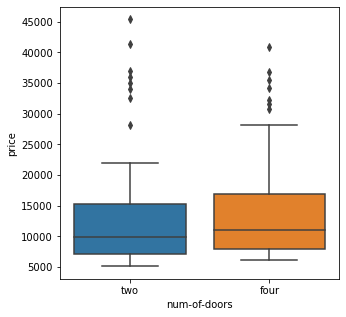

In [252]:
sns.boxplot(x = 'num-of-doors', y = 'price',data = df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

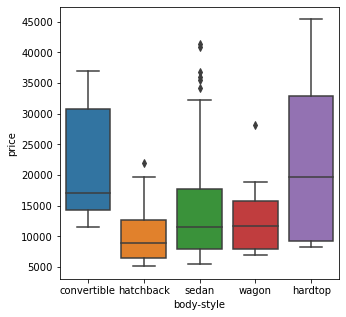

In [253]:
#which body style has more price
#hatchback the least
sns.boxplot(x = 'body-style', y = 'price',data = df)

In [254]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


In [255]:
#wheel-base, length, width, curb-weight, engine-size, bore, horsepower,
#city-mpg, highway-mpg have good correlation with price

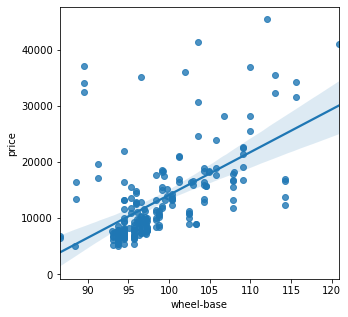

In [256]:
#Not really a good predictor
#price do generally increase with increase in wheel base
sns.regplot(x = 'wheel-base', y = 'price', data = df)
plt.rcParams['figure.figsize']=(5,5)

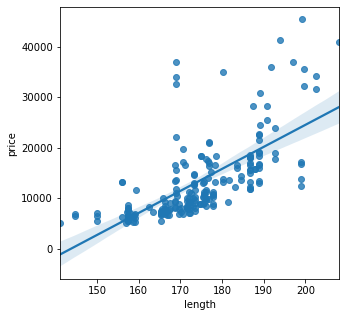

In [257]:
sns.regplot(x = 'length', y = 'price', data = df)
plt.rcParams['figure.figsize']=(5,5)

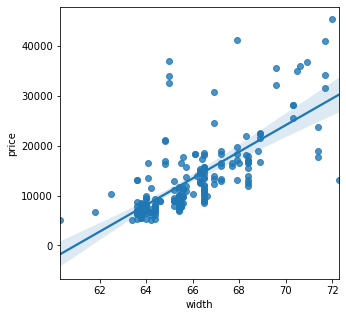

In [258]:
sns.regplot(x = 'width', y = 'price', data = df)
plt.rcParams['figure.figsize']=(5,5)

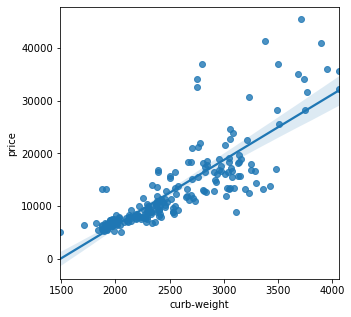

In [259]:
sns.regplot(x = 'curb-weight', y = 'price', data = df)
plt.rcParams['figure.figsize']=(5,5)

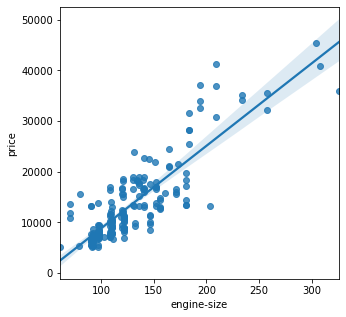

In [260]:
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.rcParams['figure.figsize']=(5,5)

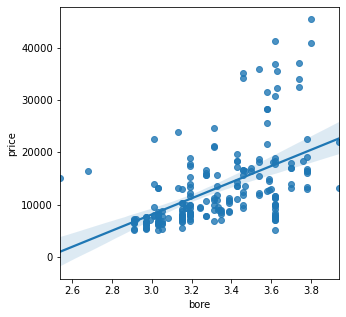

In [261]:
sns.regplot(x = 'bore', y = 'price', data = df)
plt.rcParams['figure.figsize']=(5,5)

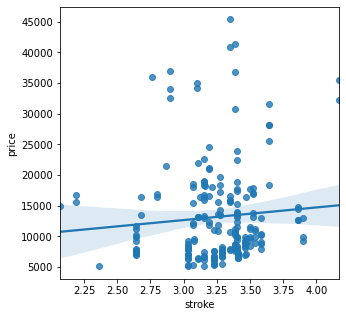

In [262]:
#not a good-predictor
sns.regplot(x = 'stroke', y = 'price', data = df)
plt.rcParams['figure.figsize']=(5,5)

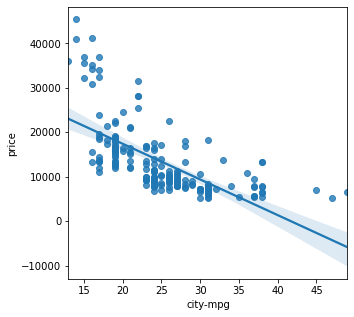

In [263]:
#good-predictor
sns.regplot(x = 'city-mpg', y = 'price', data = df)
plt.rcParams['figure.figsize']=(5,5)

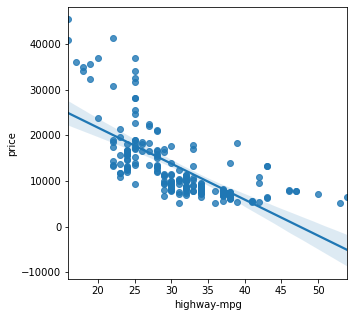

In [264]:
#good-predictor
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.rcParams['figure.figsize']=(5,5)

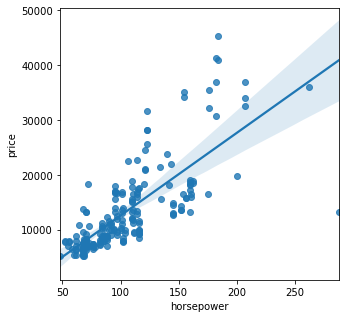

In [265]:
#good-predictor
sns.regplot(x = 'horsepower', y = 'price', data = df)
plt.rcParams['figure.figsize']=(5,5)

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

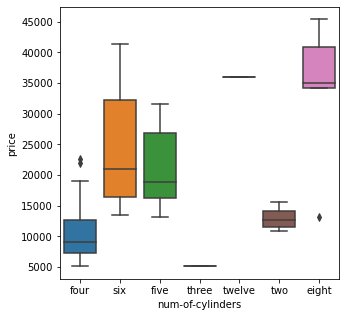

In [266]:
sns.boxplot(x = 'num-of-cylinders', y = 'price', data = df)

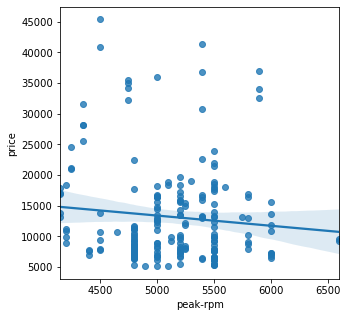

In [267]:
#Not great relation
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.rcParams['figure.figsize']=(5,5)

In [268]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [269]:
print("Skewness : %f" % df['price'].skew())

print("Kurtosis : %f" % df['price'].kurt())
#Kurtosis is value > 1, the distribution is too peaked

Skewness : 1.827324
Kurtosis : 3.354216


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Encoding

In [271]:
#only column 'num-of-doors' has value '?' in it
#Columns 'fuel-type', 'aspiration', 'num-of-doors', 'engine-location' will need label encoding
#Column 'num-of-cylinders' can be replaced with its respective values
#Every other column needs OneHotEncoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
le = LabelEncoder()
cols = ['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']
for i in cols:
    df[i] = le.fit_transform(df[i])

ct = ColumnTransformer([('encoder', OneHotEncoder() ,[2,6, 7, 14, 15, 17])], remainder = 'passthrough')
df = ct.fit_transform(df)

In [272]:
df = pd.DataFrame(df)

In [273]:
#Found out that all the columns are of object datatype so have to change it numerical data so our model can understand it
for i in df.columns:
    df[i] = pd.to_numeric(df[i])

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    float64
 1   1       205 non-null    float64
 2   2       205 non-null    float64
 3   3       205 non-null    float64
 4   4       205 non-null    float64
 5   5       205 non-null    float64
 6   6       205 non-null    float64
 7   7       205 non-null    float64
 8   8       205 non-null    float64
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    float64
 14  14      205 non-null    float64
 15  15      205 non-null    float64
 16  16      205 non-null    float64
 17  17      205 non-null    float64
 18  18      205 non-null    float64
 19  19      205 non-null    float64
 20  20      205 non-null    float64
 21  21      205 non-null    float64
 22  22

## Model Selection

In [276]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

In [277]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [372]:
#Using RFE to select important predicting columns
from sklearn.feature_selection import RFE

logreg = linear_model.LinearRegression()
rfe = RFE(logreg, 45)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
 False False False False  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True False False  True False False  True False False  True False False
  True False False False  True  True  True False False False False]
[ 1  2  1  1  1  3  1  1  1  1  1  1  1  8  1  1  1  1  1  1  1  1  1  9
 10 14 23 18  1 20  1  1  4  1  1  1  1  1  1  1  1  1  1  1  1  7  1  1
  1  6 11  1 25 26  1  5 16  1 15 17  1 13 24 12  1  1  1 19 27 21 22]


D:\Python\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=45 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [373]:
d = rfe.support_

g = pd.DataFrame(X).columns

a = g[d]

X_f = X[a]

In [395]:
X_train,X_test,y_train,y_test = train_test_split(X_f,y, test_size = 0.2, random_state = 9)

In [397]:
regr = linear_model.LinearRegression()
#regr = DecisionTreeRegressor()

In [398]:
regr.fit(X_train,y_train)

LinearRegression()

In [399]:
y_pred = regr.predict(X_test)

In [400]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE", mean_squared_error(y_test,y_pred))
print("r2", r2_score(y_test, y_pred))
print("Accuracy", r2_score(y_test, y_pred)* 100)

MSE 5175500.406052686
r2 0.900914751361777
Accuracy 90.0914751361777


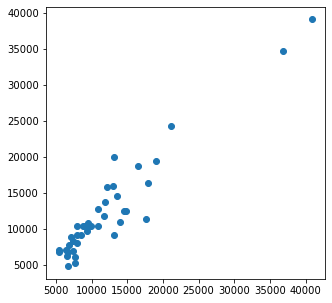

In [401]:
plt.scatter(y_test, y_pred)

In [402]:
print("How much our Model is learning")
y_pred = regr.predict(X_train)
print("MSE", mean_squared_error(y_train,y_pred))
print("r2", r2_score(y_train, y_pred))
print("Accuracy", r2_score(y_train, y_pred)* 100)

How much our Model is learning
MSE 3369390.3123684824
r2 0.9469736786352698
Accuracy 94.69736786352698
